# Speech-to-text for numberstation
Part 1 : Data import, Data preparation & EDA

Folder structure:
 - Numberstations: here are all labelised data, stored by label_0 to label_9.
 - nsexample: Files use to visualize data and try some code snipets
 - input_folder: a file that have to be predicted trought machine learning
 - output_folder: cutted input file in order to run the machine learning of each number separately.

## 1. import packages and directories structure
* Import of the librairies and packages
* check of the directories' structure.

In [1]:
# 0. Import packages and librairies

import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import librosa
import soundfile
import librosa.display
# conda install -c conda-forge librosa
# pip install librosa

from IPython import display


In [2]:
#get the directoiries of the notebook
os.getcwd()

'/Users/lolo/Downloads'

In [3]:
#get the list of sub-directories - prepared data
entries = os.listdir('numberstation/')
entries
#folders with Label_0 to Label_9 

['Label_9',
 'Label_7',
 'Label_0',
 'Label_1',
 'Label_6',
 'Label_8',
 'Label_3',
 'Label_4',
 'Label_5',
 'Label_2',
 '.ipynb_checkpoints',
 'ref_osint.txt']

In [4]:
# same output, other code :)
with os.scandir('numberstation/') as entries:
    for entry in entries:
        print(entry.name)

Label_9
Label_7
Label_0
Label_1
Label_6
Label_8
Label_3
Label_4
Label_5
Label_2
.ipynb_checkpoints
ref_osint.txt


In [5]:
next(os.walk('numberstation/.'))[1]


['Label_9',
 'Label_7',
 'Label_0',
 'Label_1',
 'Label_6',
 'Label_8',
 'Label_3',
 'Label_4',
 'Label_5',
 'Label_2',
 '.ipynb_checkpoints']

In [6]:
# get the list of wav bei Label_0
os.listdir('numberstation/Label_0/')

['20220714-143600-177__711124305180120415_NF_SUB_5.wav',
 '20220714-143500-145__711124305180120415_NF_SUB_43.wav',
 '20220714-143500-145__711124305180120415_NF_SUB_50.wav',
 '20220714-143700-209__711124305180120415_NF_SUB_49.wav',
 '20220714-143700-209__711124305180120415_NF_SUB_13.wav',
 '20220714-143800-241__711124305180120415_NF_SUB_17.wav',
 '20220714-143500-145__711124305180120415_NF_SUB_21.wav',
 '20220714-143800-241__711124305180120415_NF_SUB_15.wav',
 '20220714-143500-145__711124305180120415_NF_SUB_20.wav',
 '20220714-143500-145__711124305180120415_NF_SUB_34.wav',
 '20220714-143800-241__711124305180120415_NF_SUB_13.wav',
 '20220714-143700-209__711124305180120415_NF_SUB_4.wav',
 '20220714-143600-177__711124305180120415_NF_SUB_39.wav',
 '20220714-143500-145__711124305180120415_NF_SUB_26.wav',
 '20220714-143400-113__711124305180120415_NF_SUB_28.wav',
 '20220714-143800-241__711124305180120415_NF_SUB_36.wav',
 '20220714-143700-209__711124305180120415_NF_SUB_25.wav',
 '20220714-14380

## 2. Exploratory Data Analysis

Exploratory learning manipulation of wav files
* find some characteristics to discriminate the numbers 
 * metadata
 * extracted features

* visualisation of sample files
* play audio

--> Feature Engineering: Choose and define the properties which our model will use to evaluate the audio files

### Get some metadata/description of .wav
The analyzed file are waveform. the parameters are not the same, but 
like how we usually start evaluating data table by getting the statistical summary of the data, in the audio analysis we get the audio metadata summary by utilizing the audiosegment module in pydub.
* Channels: number of channels; 1 for mono, 2 for stereo audio
* Sample width: number of bytes per sample; 1 means 8-bit, 2 means 16-bit
* Sample rate: frequency of samples used [Hz| 
* Frame width: Number of bytes for each “frame”. One frame contains a sample for each channel.
* Length: audio file length (in milliseconds)
* Frame count: the number of frames from the sample
* Intensity: loudness in dBFS (dB relative to the maximum possible loudness)

https://towardsdatascience.com/get-to-know-audio-feature-extraction-in-python-a499fdaefe42



In [7]:
# this file will be used as example ('zero' and 'two')
example_0 = "/Users/lolo/Downloads/nsexample/test_0.wav"
example_2 = "/Users/lolo/Downloads/nsexample/test_2.wav"

In [8]:
os.listdir('/Users/lolo/Downloads/nsexample/')

['test_0.wav', 'test_2.wav']

In [9]:
from pydub import AudioSegment
# Load an example file

f_example = os.listdir('/Users/lolo/Downloads/nsexample/')

for file in f_example:
    f = os.path.splitext('/Users/lolo/Downloads/nsexample/' +file + '.wav')[0]
    audio_segment = AudioSegment.from_file(f)
    # Print attributes
    print(f"Channels: {audio_segment.channels}")
    print(f"Sample width: {audio_segment.sample_width}")
    print(f"sample rate: {audio_segment.frame_rate}")
    print(f"Frame width: {audio_segment.frame_width}")
    print(f"Length (ms): {len(audio_segment)}")
    print(f"Frame count: {audio_segment.frame_count()}")
    print(f"Intensity: {audio_segment.dBFS}")

# https://towardsdatascience.com/get-to-know-audio-feature-extraction-in-python-a499fdaefe42


Channels: 1
Sample width: 2
sample rate: 8000
Frame width: 2
Length (ms): 700
Frame count: 5601.0
Intensity: -16.0914263454909
Channels: 1
Sample width: 2
sample rate: 8000
Frame width: 2
Length (ms): 700
Frame count: 5601.0
Intensity: -12.884547564000215


/Users/lolo/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


the unique change is by the intensity. the data seems to be clean.

these informations seem not to be usefull to discriminate the numbers. For that, we will use some other characteristics

### Spectrogram as timeserie

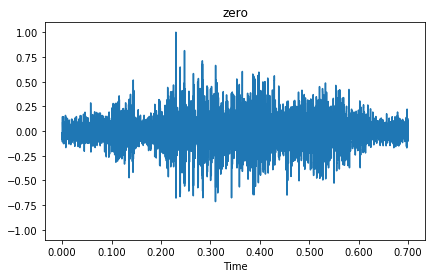

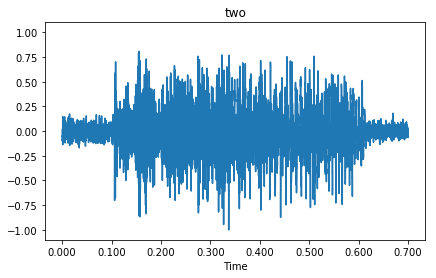

In [10]:
# visualisation  : in the newest version "waveshow" instead of waveplot

with soundfile.SoundFile(example_0) as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('zero')
    

with soundfile.SoundFile(example_2) as audio:
    waveform2 = audio.read(dtype="float32")
    sample_rate2 = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(waveform2, sr=sample_rate2)
    plt.title('two')

In the waveform, we see a diffrence between the numbers. It can be an idea to get the image of the spectre and use the image for the machine learning algorithm

The audio file is represented as time series 
* I need to create some more discriminatable features

### Audio player

In [11]:
# let's playaudio with IPython.display's Audio widget

import IPython

IPython.display.Audio("/Users/lolo/Downloads/nsexample/test_0.wav")


In [12]:

IPython.display.Audio("/Users/lolo/Downloads/nsexample/test_2.wav")

### other characteristics should be extracted/created/calculated
Librosa offers a lot of tools for audio analysis
* Root-mean-square (RMS)
* Zero crossing rate
* Mel-Frequency Cepstral Coefficients (MFCCs)
* Chroma
* Tempogram
* FFT
* STFT
...

### Fast Fourier Transform FFT

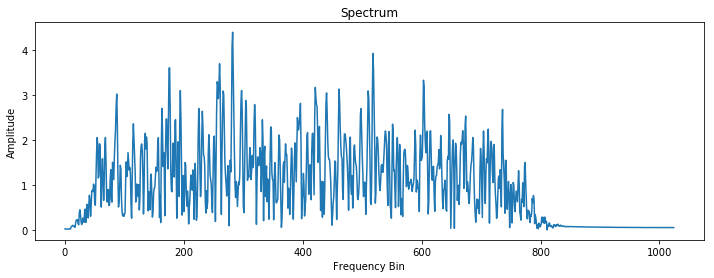

In [13]:
# map the audio from the time domain to the frequency domain using the fast Fourier transform 

data, sampling_rate = librosa.load(example_0, sr=sample_rate)
n_fft = 2048
plt.figure(figsize=(12, 4))
ft = np.abs(librosa.stft(data[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

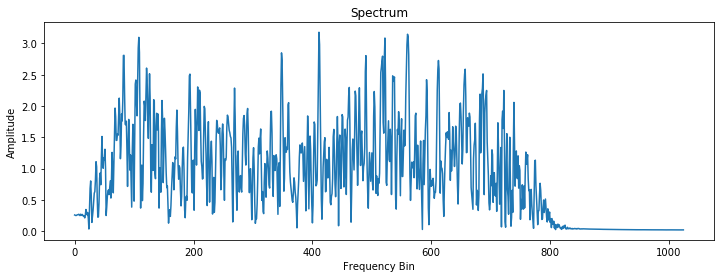

In [14]:
# map the audio from the time domain to the frequency domain using the fast Fourier transform 

data2, sampling_rate2 = librosa.load(example_2, sr=sample_rate)
n_fft = 2048
plt.figure(figsize=(12, 4))
ft = np.abs(librosa.stft(data2[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

In [15]:
# by librosa load, I add ", sr=sample_rate", because the default value is 22050.. but my data have 8000 kHz
sampling_rate2

8000

* The shape of a waveform from an audio file doesn't carry enough discriminating information for the purpose of this project
* Using librosa (python-library for audio analysis and feature extraction), I will define some features to be extracted and build an array for each file.
* for audio file, the most common are: 

    * Short Time Fourier Transform (STFT)
    * Mel-Frequency cepstral coefficients (MFCC): produces 40 MFCC
    * Mel-spectrogramms: produces 128 features
    * Chromagram: produce 12 features

### STFT Short-Time Fourier Transform

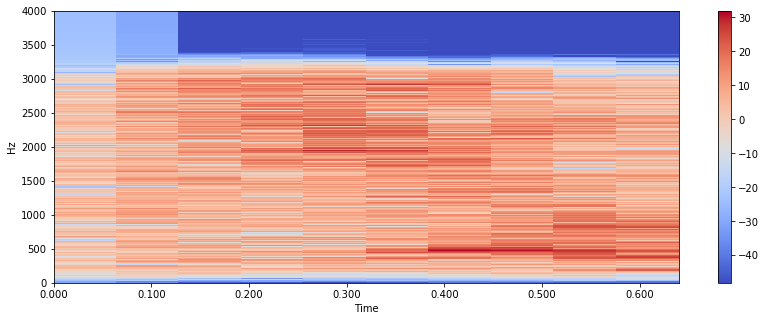

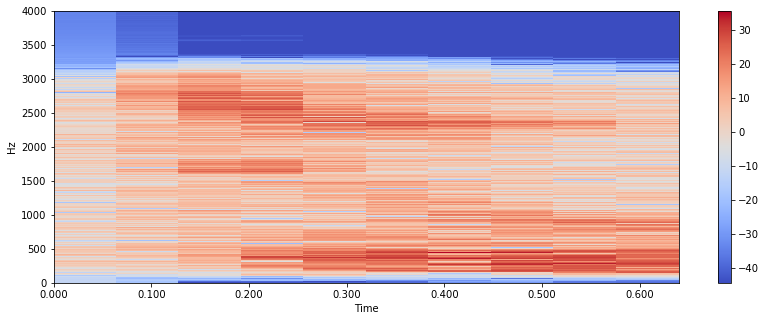

In [16]:
# https://aiplanet.com/blog/audio-data-analysis-using-deep-learning-with-python-part-1/
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=8000, x_axis='time', y_axis='hz')
plt.colorbar();

X = librosa.stft(data2)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=8000, x_axis='time', y_axis='hz')
plt.colorbar();

### Linear-frequency power spectrogram

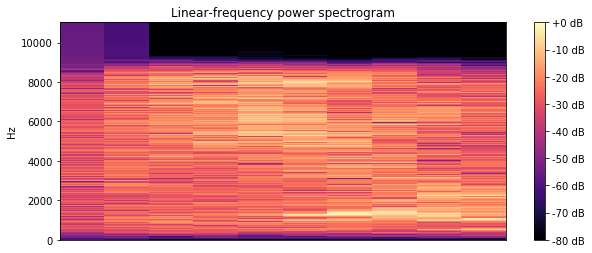

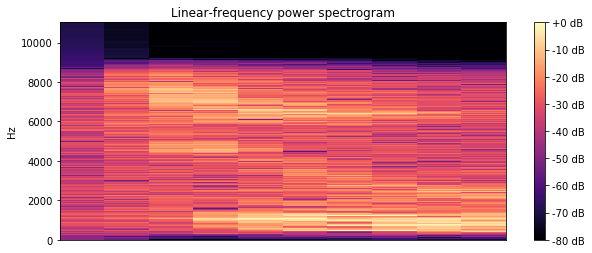

In [17]:
# Plot spectogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
# amplitude_to_db converts an amplitude spectrogram to dB-scaled spectrogram
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

# Plot spectogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(data2)), ref=np.max)
# amplitude_to_db converts an amplitude spectrogram to dB-scaled spectrogram
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

### Chroma

A chroma feature or vector is typically a 12-element feature vector indicating 
how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the 
signal. In short, it provides a robust way to describe a similarity measure between music pieces.

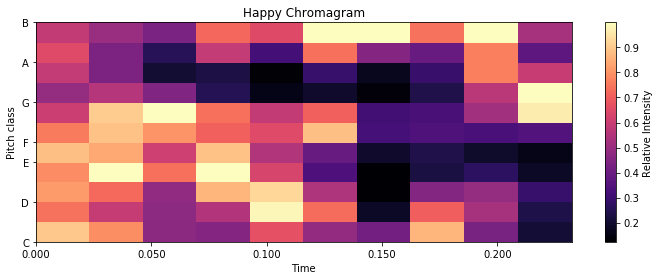

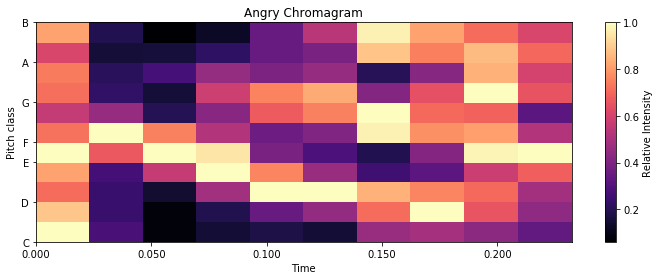

In [18]:
chromagram = librosa.feature.chroma_stft(y=data, sr=sample_rate)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
plt.colorbar(label='Relative Intensity')
plt.title('Happy Chromagram')
plt.tight_layout()

chromagram = librosa.feature.chroma_stft(y=data2, sr=sample_rate2)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time')
plt.colorbar(label='Relative Intensity')
plt.title('Angry Chromagram')
plt.tight_layout()

In [19]:
sample_rate2

8000

In [20]:
#chromagram = librosa.feature.chroma_stft(data, sr=8000)
#plt.figure(figsize=(15, 5))
#librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

#chromagram = librosa.feature.chroma_stft(data2, sr=8000)
#plt.figure(figsize=(15, 5))
#librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

### MFCC

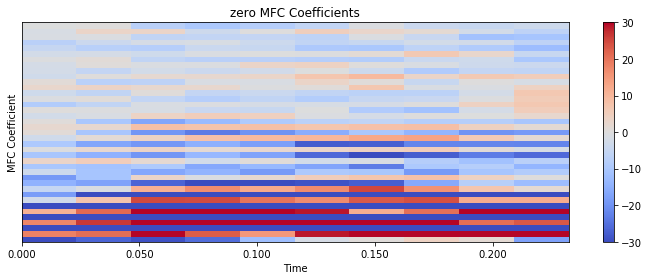

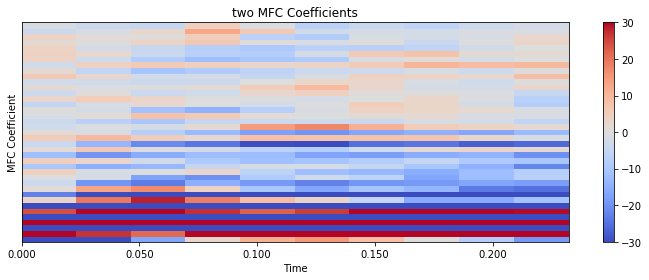

In [21]:

from matplotlib.colors import Normalize
mfc_coefficients = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('zero MFC Coefficients')
plt.tight_layout()


from matplotlib.colors import Normalize
mfc_coefficients = librosa.feature.mfcc(y=data2, sr=sample_rate2, n_mfcc=40)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfc_coefficients, x_axis='time',norm=Normalize(vmin=-30,vmax=30))
plt.colorbar()
plt.yticks(())
plt.ylabel('MFC Coefficient')
plt.title('two MFC Coefficients')
plt.tight_layout()

/Users/lolo/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


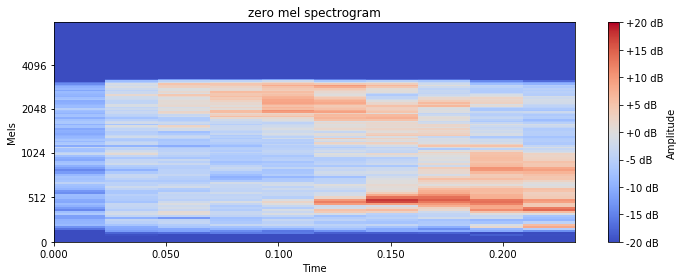

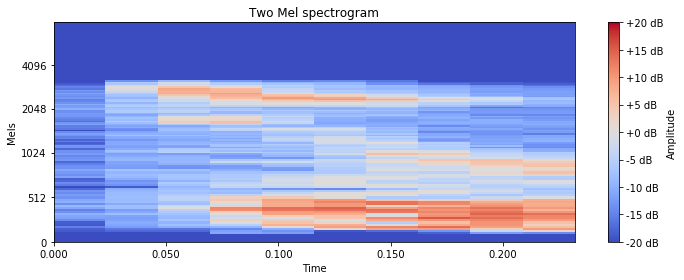

In [22]:

melspectrogram = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),y_axis='mel',fmax=8000, x_axis='time', norm=Normalize(vmin=-20,vmax=20))
plt.colorbar(format='%+2.0f dB',label='Amplitude')
plt.ylabel('Mels')
plt.title('zero mel spectrogram')
plt.tight_layout()

melspectrogram = librosa.feature.melspectrogram(y=data2, sr=sample_rate2, n_mels=128, fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S=melspectrogram, ref=np.mean),y_axis='mel',fmax=8000, x_axis='time', norm=Normalize(vmin=-20,vmax=20))
plt.colorbar(format='%+2.0f dB',label='Amplitude')
plt.ylabel('Mels')
plt.title('Two Mel spectrogram')
plt.tight_layout()

In [23]:
# musicinformationretrieval.com --> scale the feature such that each dimension  has zero mean and unit variance

In [24]:
mfccs = librosa.feature.mfcc(data2, sr=sample_rate2)

/Users/lolo/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[-0.0927124  -0.07971191 -0.04693604 ...  0.00515747 -0.06512451
  0.00912476] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


/Users/lolo/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/lolo/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:197: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


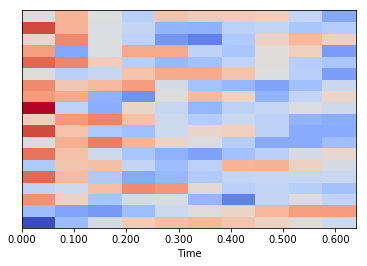

In [25]:
import sklearn
# feature_scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis =1)
librosa.display.specshow(mfccs, sr=sample_rate2, x_axis='time')

In [26]:
#have a look in the available data

y, sr = librosa.load(example_0, mono = True, sr=None)
chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
rmse = librosa.feature.rms(y = y)
spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y = y, sr = sr)
#MFCC coefficients contain information about the rate of change in different spectral bands.
stft_spectrogram=np.abs(librosa.stft(y))
feat_mfcc = np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0)
feat_std_mfcc = np.std(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0)
feat_chromagram = np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
feat_melspectrogram = np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128).T,axis=0)
# there are array, in order to use it in a table, we will use the mean of each array


#print(np.mean(mfcc))
print(np.mean(feat_melspectrogram))
print(np.min(feat_melspectrogram))
print(np.max(feat_melspectrogram))
print(np.var(feat_melspectrogram))
print(feat_mfcc.shape) # 40 
print(feat_melspectrogram.shape) # 128

np.mean(feat_melspectrogram)
np.mean(feat_chromagram)
#np.mean(feat_mfcc)

5.6126413
0.00012144563
56.771397
64.31358
(40,)
(128,)


0.75246954

In [27]:
#remove silence/chunk
# https://medium.com/mlearning-ai/handling-audio-data-for-machine-learning-7ba225f183cb

#def removeSilence(data):
#    return data[librosa.effects.split(data)[0][0] : librosa.effects.split(data)[0][-1]]

# Create a dataframe with the metadata and features

In [28]:
# define the header
#header = "filename chroma_stft_mean rms_mean spectral_centroid_mean spectral_bandwidth_mean rolloff_mean zero_crossing_rate_mean harmony_mean perceptr_mean perceptr_var tempo  Channels Sample_width sample_rate Frame_width Frame_count Intensity mfcc1_mean mfcc2_mean mfcc3_mean mfcc4_mean label".split()
header = "filename lenght chroma_stft_mean rmse_mean spectral_centroid_mean spectral_bandwidth_mean rolloff_mean zero_crossing_rate_mean Channels Sample_width sample_rate Frame_width Frame_count Intensity label".split()

In [29]:
# create a csv file
import csv
import librosa
import os
import numpy as np

file = open('df_wav.csv', 'w', newline = '')
with file:
    writer = csv.writer(file)
    writer.writerow(header)



In [30]:
# define the labels
labels="Label_0 Label_1 Label_2 Label_3 Label_4 Label_5 Label_6 Label_7 Label_8 Label_9".split()

In [31]:
#delete DSSTORE 
#sudo find / -name ".DS_Store" -depth -exec rm {} \;

In [32]:

def create_df():
    for label in labels:

        for filename in os.listdir(f"/Users/lolo/Downloads/numberstation/{label}/"):
            #glob.glob(os.path.join("/Users/lolo/Downloads/numberstation/{label}/","*.wav")
            sound_name = f"/Users/lolo/Downloads/numberstation/{label}/{filename}"
            audio_segment = AudioSegment.from_file(sound_name)
            y, sr = librosa.load(sound_name, mono = True, sr=None)
            chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
            rmse = librosa.feature.rms(y = y)
            spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
            spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
            rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            #mfcc = librosa.feature.mfcc(y = y, sr = sr)

            to_append = f'{filename} {len(audio_segment)} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)} {audio_segment.channels} {audio_segment.sample_width} {audio_segment.frame_rate} {audio_segment.frame_width} {audio_segment.frame_count()} {audio_segment.dBFS}'

            #for e in mfcc:
            #    to_append += f' {np.mean(e)}'

            to_append += f' {label}'


            file = open('df_wav.csv', 'a', newline = '')
    
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())
create_df()

In [33]:
# {feat_mfcc} {feat_std_mfcc} {feat_chromagram} {feat_melspectrogram}

In [34]:
import pandas as pd
df = pd.read_csv('df_wav.csv')


In [35]:
pd.set_option('display.max_columns', None)
df.head()

,filename,lenght,chroma_stft_mean,rmse_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,Channels,Sample_width,sample_rate,Frame_width,Frame_count,Intensity,label
0,20220714-143600-177__711124305180120415_NF_SUB...,700,0.502567,0.196293,1267.944128,814.960484,2177.556818,0.256792,1,2,8000,2,5601.0,-13.710065,Label_0
1,20220714-143500-145__711124305180120415_NF_SUB...,700,0.580895,0.196412,1527.338953,879.653000,2611.505682,0.339799,1,2,8000,2,5601.0,-13.653713,Label_0
2,20220714-143500-145__711124305180120415_NF_SUB...,700,0.475697,0.201314,1343.043323,870.769439,2414.772727,0.274325,1,2,8000,2,5601.0,-13.425670,Label_0
3,20220714-143700-209__711124305180120415_NF_SUB...,700,0.460273,0.174682,1314.383506,855.428716,2276.988636,0.273837,1,2,8000,2,5601.0,-14.694014,Label_0
4,20220714-143700-209__711124305180120415_NF_SUB...,700,0.437962,0.186029,1248.294964,856.617329,2318.536932,0.242987,1,2,8000,2,5601.0,-13.842123,Label_0


In [36]:
# add extracted features array
#stft_spectrogram=np.abs(librosa.stft(y))
#feat_mfcc = np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0)
#feat_std_mfcc = np.std(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0)
#feat_chromagram = np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
#feat_melspectrogram =np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128).T,axis=0)        



In [37]:
df.describe()

,lenght,chroma_stft_mean,rmse_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,Channels,Sample_width,sample_rate,Frame_width,Frame_count,Intensity
count,625.0,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.0,625.0,625.0,625.0,625.0,625.000000
mean,700.0,0.532236,0.175878,1341.200594,826.936085,2330.705114,0.279514,1.0,2.0,8000.0,2.0,5601.0,-14.584718
std,0.0,0.052905,0.026166,195.538018,72.486380,297.187074,0.056806,0.0,0.0,0.0,0.0,0.0,1.288617
min,700.0,0.380804,0.107785,874.642413,579.490395,1459.161932,0.177779,1.0,2.0,8000.0,2.0,5601.0,-18.575003
25%,700.0,0.501432,0.158058,1194.914430,770.843854,2098.011364,0.236816,1.0,2.0,8000.0,2.0,5601.0,-15.424704
50%,700.0,0.527387,0.175049,1304.400332,843.130956,2400.923295,0.264249,1.0,2.0,8000.0,2.0,5601.0,-14.532909
75%,700.0,0.558236,0.193164,1484.361023,878.396400,2587.357955,0.312544,1.0,2.0,8000.0,2.0,5601.0,-13.669045
max,700.0,0.705817,0.245965,1956.871332,990.178075,2779.474432,0.472257,1.0,2.0,8000.0,2.0,5601.0,-11.686964


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lenght,625.0,700.000000,0.000000,700.000000,700.000000,700.000000,700.000000,700.000000
chroma_stft_mean,625.0,0.532236,0.052905,0.380804,0.501432,0.527387,0.558236,0.705817
rmse_mean,625.0,0.175878,0.026166,0.107785,0.158058,0.175049,0.193164,0.245965
spectral_centroid_mean,625.0,1341.200594,195.538018,874.642413,1194.914430,1304.400332,1484.361023,1956.871332
spectral_bandwidth_mean,625.0,826.936085,72.486380,579.490395,770.843854,843.130956,878.396400,990.178075
rolloff_mean,625.0,2330.705114,297.187074,1459.161932,2098.011364,2400.923295,2587.357955,2779.474432
zero_crossing_rate_mean,625.0,0.279514,0.056806,0.177779,0.236816,0.264249,0.312544,0.472257
Channels,625.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Sample_width,625.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
sample_rate,625.0,8000.000000,0.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000


In [39]:
df.shape

(625, 15)

In [40]:
df.nunique()

filename                   625
lenght                       1
chroma_stft_mean           624
rmse_mean                  625
spectral_centroid_mean     625
spectral_bandwidth_mean    625
rolloff_mean               558
zero_crossing_rate_mean    572
Channels                     1
Sample_width                 1
sample_rate                  1
Frame_width                  1
Frame_count                  1
Intensity                  567
label                       10
dtype: int64

In [41]:
# some fields are not usefull to discriminate our data set: channels, sample width, sample rate, frame width, frame count, lenght

In [42]:
# show statistics per label 
df.groupby("label")['chroma_stft_mean','rmse_mean','spectral_centroid_mean','spectral_bandwidth_mean','rolloff_mean','zero_crossing_rate_mean'].describe().reset_index()

label chroma_stft_mean                                                    \
                      count      mean       std       min       25%       50%   
0  Label_0             33.0  0.467460  0.047585  0.396249  0.434322  0.459038   
1  Label_1            100.0  0.522875  0.032164  0.439734  0.501831  0.522694   
2  Label_2             25.0  0.511245  0.031731  0.448944  0.490265  0.509509   
3  Label_3             39.0  0.520482  0.044028  0.446302  0.487150  0.513740   
4  Label_4            182.0  0.524480  0.025368  0.424769  0.507157  0.527158   
5  Label_5             82.0  0.600710  0.045325  0.451806  0.585345  0.611535   
6  Label_6             30.0  0.580802  0.049508  0.487465  0.542521  0.574896   
7  Label_7             36.0  0.573174  0.045374  0.506399  0.540423  0.572128   
8  Label_8             25.0  0.452181  0.050922  0.380804  0.405049  0.461604   
9  Label_9             73.0  0.517500  0.040715  0.441341  0.489677  0.509710   

                      rmse_mean                                          \
        75%       max     count      mean       std       min       25%   
0  0.490639  0.580895      33.0  0.189141  0.018092  0.142304  0.180989   
1  0.540710  0.605970     100.0  0.169741  0.021150  0.130828  0.156421   
2  0.535060  0.586997      25.0  0.207150  0.019642  0.169683  0.197679   
3  0.548033  0.599733      39.0  0.158831  0.021925  0.110865  0.142394   
4  0.542287  0.578767     182.0  0.193661  0.022094  0.129529  0.178298   
5  0.630975  0.679630      82.0  0.164893  0.015086  0.131526  0.153967   
6  0.616250  0.664608      30.0  0.129606  0.014998  0.107785  0.118717   
7  0.602544  0.705817      36.0  0.164418  0.017546  0.133670  0.151951   
8  0.486211  0.547708      25.0  0.165649  0.018575  0.123098  0.156407   
9  0.541971  0.645212      73.0  0.172857  0.019558  0.113262  0.160071   

                                spectral_centroid_mean               \
        50%       75%       max                  count         mean   
0  0.188197  0.201314  0.226594                   33.0  1312.130965   
1  0.167025  0.181397  0.232683                  100.0  1264.532343   
2  0.204287  0.220350  0.245965                   25.0  1335.098814   
3  0.157718  0.170420  0.208710                   39.0  1574.043175   
4  0.192525  0.211682  0.243587                  182.0  1195.311937   
5  0.164781  0.175924  0.201689                   82.0  1499.424330   
6  0.128307  0.135735  0.160252                   30.0  1688.071697   
7  0.160583  0.177953  0.202089                   36.0  1431.623766   
8  0.165647  0.175154  0.207810                   25.0  1552.721638   
9  0.169893  0.187077  0.227726                   73.0  1263.471861   

                                                                   \
          std          min          25%          50%          75%   
0  103.796272  1076.373601  1253.221062  1300.632683  1333.556576   
1  142.826955   930.835367  1173.246749  1271.096584  1334.089496   
2  123.462606  1120.943171  1237.977067  1335.162080  1421.907179   
3  138.747414  1261.352828  1494.581827  1577.606108  1661.715617   
4  100.068531   924.362086  1138.370120  1191.761171  1246.720104   
5  148.490471  1124.332391  1418.865398  1502.122040  1580.652978   
6  100.570801  1393.088651  1636.588216  1701.776853  1744.139712   
7   92.903354  1190.650116  1401.387898  1434.873940  1481.723378   
8  102.975282  1366.627470  1478.267249  1549.735195  1607.654809   
9  159.324198   874.642413  1172.156903  1252.928930  1359.961434   

               spectral_bandwidth_mean                                     \
           max                   count        mean        std         min   
0  1627.738860                    33.0  844.927219  24.692313  779.758060   
1  1710.555675                   100.0  845.902717  47.596520  707.685390   
2  1582.994873                    25.0  839.081693  33.183011  776.873746   
3  1823.731962                    39.0  894.168173  34.901486  8

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 15 columns):
filename                   625 non-null object
lenght                     625 non-null int64
chroma_stft_mean           625 non-null float64
rmse_mean                  625 non-null float64
spectral_centroid_mean     625 non-null float64
spectral_bandwidth_mean    625 non-null float64
rolloff_mean               625 non-null float64
zero_crossing_rate_mean    625 non-null float64
Channels                   625 non-null int64
Sample_width               625 non-null int64
sample_rate                625 non-null int64
Frame_width                625 non-null int64
Frame_count                625 non-null float64
Intensity                  625 non-null float64
label                      625 non-null object
dtypes: float64(8), int64(5), object(2)
memory usage: 73.3+ KB


In [44]:
# select numerical field to plot some statistics
num_cols = df.select_dtypes(include=np.number).columns.tolist()

lenght
Skew : 0


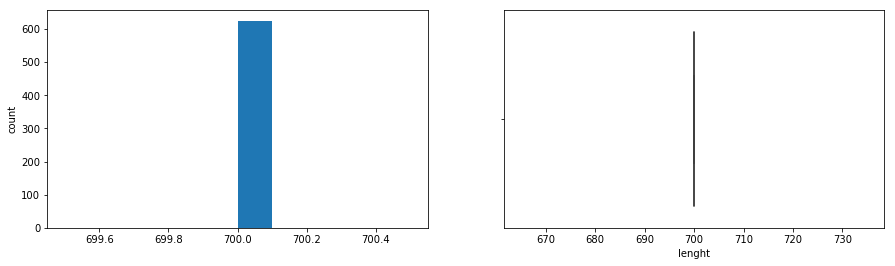

chroma_stft_mean
Skew : 0.22


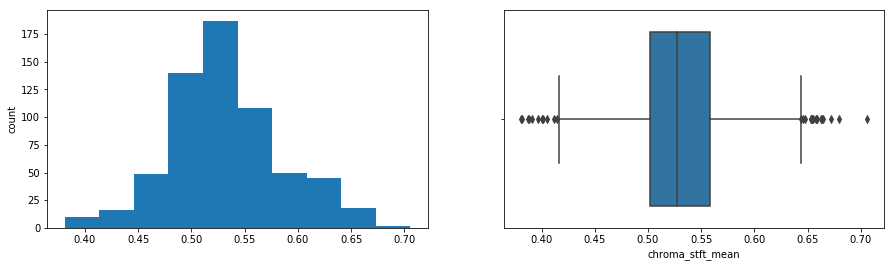

rmse_mean
Skew : 0.07


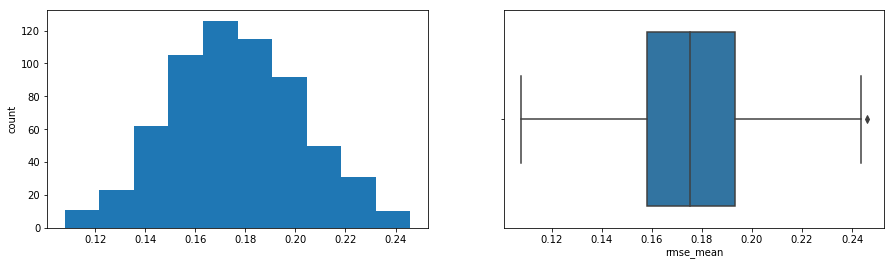

spectral_centroid_mean
Skew : 0.45


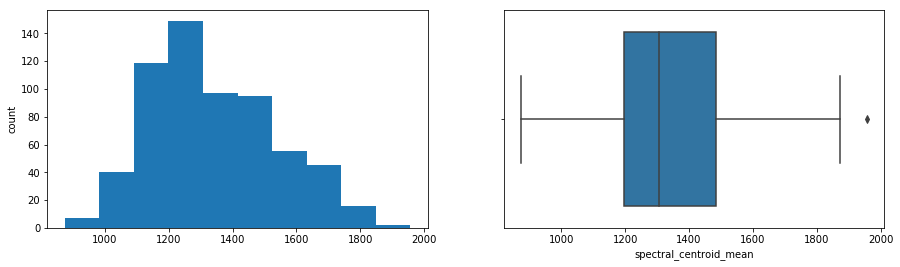

spectral_bandwidth_mean
Skew : -0.47


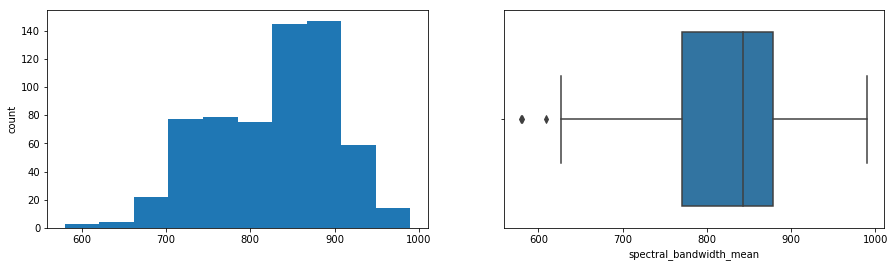

rolloff_mean
Skew : -0.59


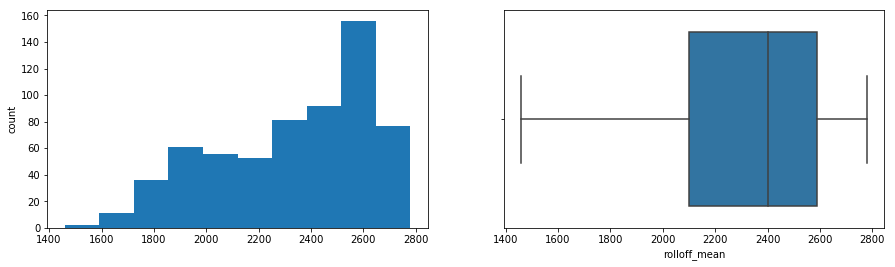

zero_crossing_rate_mean
Skew : 0.86


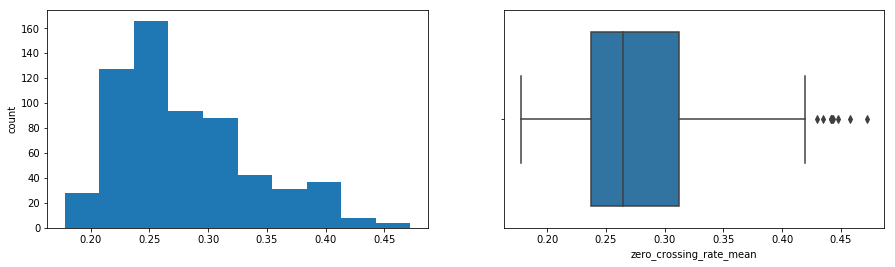

Channels
Skew : 0


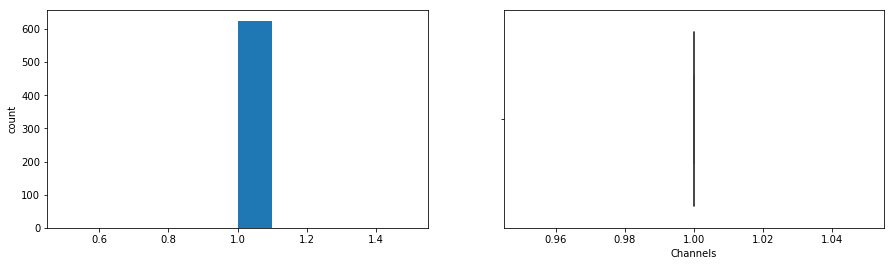

Sample_width
Skew : 0


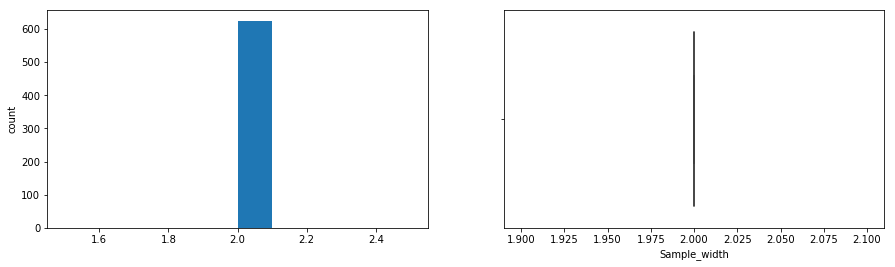

sample_rate
Skew : 0


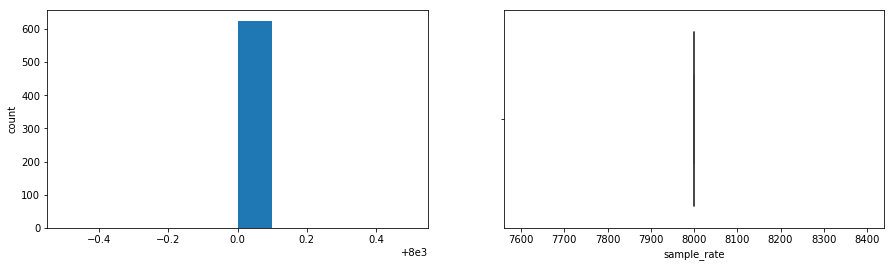

Frame_width
Skew : 0


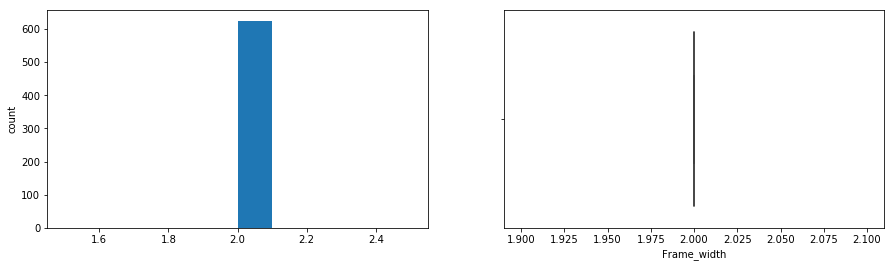

Frame_count
Skew : 0


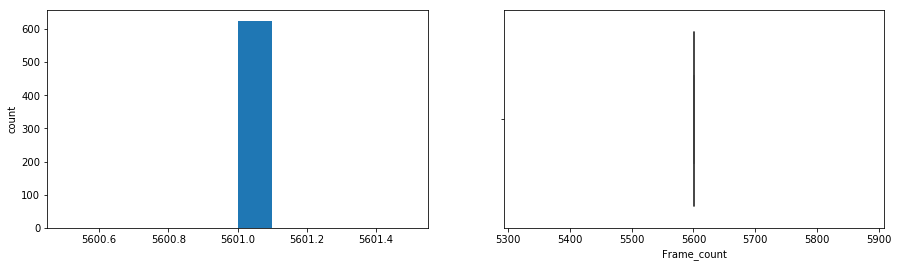

Intensity
Skew : -0.29


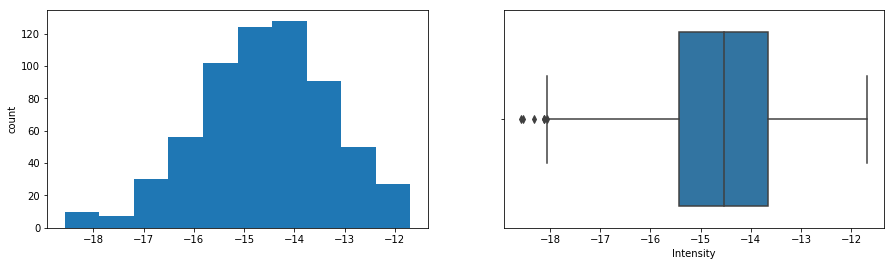

In [45]:
# to visualize numerical variables, histogram and boxplot are good to show the pattern and outliers 
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

some features are useless (the same by all sample): 
- spectral_centroid_var, 
- spectral_bandwidth_mean,
- spectral_bandwidth_var

some are very light right/left skewed (Data can be "skewed", meaning it tends to have a long tail on one side or the other):
- chroma_stft_var
- rms_mean
- rms_var
- spectral_centroid_mean

The skewed data can affect our machine learning model’s predicting capabilities, it is better to transform the skewed data to normally distributed data using:

- Power Transformation
- Log Transformation
- Exponential Transformation



In [46]:
# https://github.com/IliaZenkov/sklearn-audio-classification/blob/master/sklearn_audio_classification.ipynb

## 3. Feature extraction/engineering



Because the chromagram, mel spectrogram and MFCCs are calculated on audio frames produced by STFT, we're going to get a matrix back from each function, so we'll take the mean of those matrices to produce a single feature array for each feature and each audio sample, i.e. 3 feature arrays per audio sample.

In [47]:
import librosa

def feature_chromagram(waveform, sample_rate):
    # STFT computed here explicitly; mel spectrogram and MFCC functions do this under the hood
    stft_spectrogram=np.abs(librosa.stft(waveform))
    # Produce the chromagram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    chromagram=np.mean(librosa.feature.chroma_stft(S=stft_spectrogram, sr=sample_rate).T,axis=0)
    return chromagram

def feature_melspectrogram(waveform, sample_rate):
    # Produce the mel spectrogram for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # Using 8khz as upper frequency bound should be enough for most speech classification tasks
    melspectrogram=np.mean(librosa.feature.melspectrogram(y=waveform, sr=sample_rate, n_mels=128).T,axis=0)
    return melspectrogram

def feature_mfcc(waveform, sample_rate):
    # Compute the MFCCs for all STFT frames and get the mean of each column of the resulting matrix to create a feature array
    # 40 filterbanks = 40 coefficients
    mfc_coefficients=np.mean(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0) 
    return mfc_coefficients

def std_feature_mfcc(waveform, sample_rate):
    #std
    mfc_coefficients_std=np.std(librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=40).T, axis=0) 
    return mfc_coefficients_std

def feature_zero_crossing_rate(waveform):
    return np.mean(librosa.feature.zero_crossing_rate(y= waveform).T, axis=0) 


In [48]:


def get_features(file):
    if True:
    # load an individual soundfile
    #    waveform, sample_rate = librosa.load(file)
    # load an individual soundfile
     with soundfile.SoundFile(file) as audio:
        waveform = audio.read(dtype="float32")
        sample_rate = audio.samplerate

        mfc_coefficients = feature_mfcc(waveform, sample_rate)
        std_mfc_coefficients = std_feature_mfcc(waveform, sample_rate)
        chromagram = feature_chromagram(waveform, sample_rate)
        melspectrogram = feature_melspectrogram(waveform, sample_rate)

        zero_crossing_rate = feature_zero_crossing_rate(waveform)

        # cent = np.mean(librosa.feature.spectral_centroid(y=waveform, sr=sample_rate).T, axis=0) 
        
        feature_matrix=np.array([])

        # use np.hstack to stack our feature arrays horizontally to create a feature matrix
        #feature_matrix = np.hstack((mfc_coefficients))
        # Reduce the features to 2 selectors
        feature_matrix = np.hstack((chromagram, std_mfc_coefficients))

        return feature_matrix
#https://librosa.org/doc/main/generated/librosa.load.html


In [49]:
# get data
import os, glob, sys
## Filename like: label_text.wav --> f.e. 7_test.wav
# TypeError: unsupported operand type(s) for +: 'PosixPath' and 'str

# path to search file
path = '/Users/lolo/Downloads/numberstation/*/*.wav'
def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob(path):
        dir_name=os.path.dirname(file)
        #number=numbers[file_name.split("-")[2]]
        number = dir_name.split('_')[1]
        features = get_features(file)
        X.append(features)
        y.append(number)
        count += 1
        #'\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{len(glob.glob(path))} audio samples',end=' ')
    return np.array(X) , np.array(y)

features, label = load_data()

 Processed 625/625 audio samples 

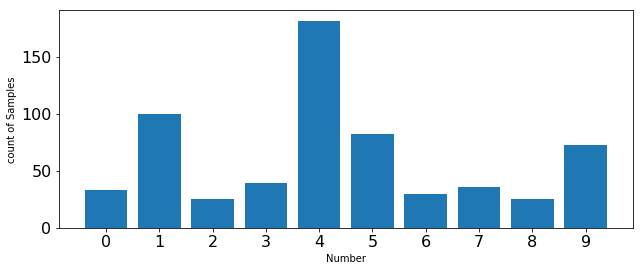

In [50]:
# plot labels
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)

label_list, count = np.unique(label, return_counts=True)
plt.bar(x=range(10), height=count)
plt.xticks(ticks=range(10), labels = [label for label in label_list],fontsize=10)
plt.xlabel('Number')
plt.tick_params(labelsize=16)
plt.ylabel('count of Samples')
plt.show()

In [51]:
# have a look at the features
features_df = pd.DataFrame(features) 
features_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,0.523079,0.607110,0.612136,0.662035,0.802620,0.987586,0.831186,0.663177,0.584969,0.612292,0.614204,0.536074,55.799591,20.094698,26.274197,22.069885,32.695274,8.882731,16.541862,7.778741,21.200638,6.425390,9.576688,4.741343,9.298731,7.234930,3.159130,8.426990,2.827542,10.109979,4.931144,6.644821,4.922099,5.166003,2.755198,4.940981,5.153464,1.921832,4.745741,8.754597,5.876249,6.020852,4.320662,4.394981,5.287080,3.070697,3.553477,2.482128,3.952864,2.439782,2.675939,4.184082
1,0.574490,0.664457,0.712774,0.693409,0.825494,0.985598,0.900602,0.761715,0.653890,0.667360,0.726949,0.643794,36.882851,28.337616,32.103489,17.915924,33.679390,7.748272,20.233000,10.136287,17.474869,4.269634,6.875053,4.043409,7.319465,8.416488,5.982951,8.407752,3.360528,9.010057,5.343500,9.185234,5.308166,5.679259,2.488797,4.594226,5.525533,2.765649,4.748443,7.507586,5.957283,3.149971,4.180657,4.285440,5.036645,2.540424,2.834892,2.702358,3.650725,2.346441,2.940221,3.443141
2,0.523813,0.596341,0.558105,0.628457,0.785094,0.993605,0.786309,0.525095,0.416031,0.459353,0.454415,0.442114,61.471428,27.653824,28.525042,17.980824,29.390160,13.943318,19.003227,9.149520,19.223343,7.561882,11.659381,4.637424,7.333731,6.987285,3.946182,9.733550,3.708324,10.661196,4.580323,9.157130,5.977042,7.128653,2.857808,5.279173,5.590940,2.202042,6.160880,8.024219,5.174380,6.242360,2.893130,4.410636,3.951062,2.779497,5.280069,3.224036,4.701131,2.088017,3.439038,4.974139
3,0.466335,0.567239,0.569673,0.579865,0.752417,0.990154,0.903685,0.615342,0.425775,0.452578,0.489551,0.456082,46.433186,17.799498,38.817997,15.512599,28.693243,9.704134,16.481768,11.854286,18.025005,6.937805,9.866681,5.271411,6.506249,5.218722,3.860900,5.945374,3.144572,9.567131,5.642511,6.372761,6.889600,6.388574,4.637425,7.740426,4.980608,4.341689,6.629709,8.260063,6.530111,4.884664,3.879750,4.454046,5.694018,4.083573,3.507958,3.206272,4.330352,1.753184,2.666905,3.821867
4,0.486119,0.596786,0.574704,0.567705,0.752210,0.995017,0.868648,0.605989,0.470035,0.486009,0.493943,0.490840,60.685028,25.400373,18.052065,22.702181,29.770008,15.467167,11.949622,7.480163,16.778522,6.510088,4.611450,3.038726,4.978287,7.045979,3.805672,7.428802,3.571788,9.309097,4.192515,7.378680,6.230608,5.685576,2.601416,4.591383,3.678859,3.280693,6.093367,11.415841,5.356431,5.765106,3.329795,3.868657,4.259264,2.246528,3.678072,2.131408,3.417032,2.237367,2.615399,3.369017
5,0.538754,0.652747,0.603783,0.612284,0.782513,0.987684,0.913793,0.683958,0.540966,0.562005,0.558123,0.546523,56.004562,14.658807,47.733276,16.301998,38.180798,7.576052,20.600946,11.819402,23.321280,4.749194,14.751993,6.893768,8.418427,8.126733,7.540287,8.328606,4.196727,8.585261,7.024274,6.632300,8.448425,2.903153,2.985768,4.606889,6.221912,4.706223,6.733654,9.860958,7.719444,5.541804,3.961138,4.646607,7.280050,5.143000,3.837943,2.465626,6.032576,1.411317,4.416183,3.545972
6,0.567817,0.641558,0.619937,0.633266,0.802893,0.974170,0.838449,0.705506,0.601564,0.621984,0.652518,0.605462,58.102474,18.518393,48.983307,16.013330,26.914436,10.136131,18.779139,14.014842,19.185930,6.677798,12.103931,7.743630,7.748130,7.125362,5.066699,8.374643,3.794258,10.292506,4.811506,6.568989,7.563041,4.800522,6.193652,5.748649,4.939762,3.165303,6.856766,10.534070,6.757784,5.152699,4.247082,5.475202,6.057582,3.106607,4.464245,3.646819,5.077362,2.351520,2.857569,2.970057
7,0.487523,0.587622,0.575880,0.583589,0.747776,0.973112,0.936246,0.734692,0.571598,0.545954,0.580259,0.543935,55.515751,11.316566,54.747910,17.734423,36.060448,8.023858,24.830557,11.799748,20.482807,5.453571,15.896645,7.828796,6.750910,7.568632,6.434996,7.975674,4.093955,7.421826,5.662408,5.620700,8.228569,3.342175,3.660354,5.153517,4.991780,4.461754,7.435500,11.098166,6.984709,4.394399,4.265048,5.184756,6.089211,4.751193,2.638371,2.708741,4.941893,1.907208,2.370122,3.294338
8,0.578616,0.621113

In [52]:
label

array(['9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',
       '9', '9', '9', '9', '9', '9', '9', '9', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

In [53]:
features_df['number'] = label
features_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,number
0,0.523079,0.607110,0.612136,0.662035,0.802620,0.987586,0.831186,0.663177,0.584969,0.612292,0.614204,0.536074,55.799591,20.094698,26.274197,22.069885,32.695274,8.882731,16.541862,7.778741,21.200638,6.425390,9.576688,4.741343,9.298731,7.234930,3.159130,8.426990,2.827542,10.109979,4.931144,6.644821,4.922099,5.166003,2.755198,4.940981,5.153464,1.921832,4.745741,8.754597,5.876249,6.020852,4.320662,4.394981,5.287080,3.070697,3.553477,2.482128,3.952864,2.439782,2.675939,4.184082,9
1,0.574490,0.664457,0.712774,0.693409,0.825494,0.985598,0.900602,0.761715,0.653890,0.667360,0.726949,0.643794,36.882851,28.337616,32.103489,17.915924,33.679390,7.748272,20.233000,10.136287,17.474869,4.269634,6.875053,4.043409,7.319465,8.416488,5.982951,8.407752,3.360528,9.010057,5.343500,9.185234,5.308166,5.679259,2.488797,4.594226,5.525533,2.765649,4.748443,7.507586,5.957283,3.149971,4.180657,4.285440,5.036645,2.540424,2.834892,2.702358,3.650725,2.346441,2.940221,3.443141,9
2,0.523813,0.596341,0.558105,0.628457,0.785094,0.993605,0.786309,0.525095,0.416031,0.459353,0.454415,0.442114,61.471428,27.653824,28.525042,17.980824,29.390160,13.943318,19.003227,9.149520,19.223343,7.561882,11.659381,4.637424,7.333731,6.987285,3.946182,9.733550,3.708324,10.661196,4.580323,9.157130,5.977042,7.128653,2.857808,5.279173,5.590940,2.202042,6.160880,8.024219,5.174380,6.242360,2.893130,4.410636,3.951062,2.779497,5.280069,3.224036,4.701131,2.088017,3.439038,4.974139,9
3,0.466335,0.567239,0.569673,0.579865,0.752417,0.990154,0.903685,0.615342,0.425775,0.452578,0.489551,0.456082,46.433186,17.799498,38.817997,15.512599,28.693243,9.704134,16.481768,11.854286,18.025005,6.937805,9.866681,5.271411,6.506249,5.218722,3.860900,5.945374,3.144572,9.567131,5.642511,6.372761,6.889600,6.388574,4.637425,7.740426,4.980608,4.341689,6.629709,8.260063,6.530111,4.884664,3.879750,4.454046,5.694018,4.083573,3.507958,3.206272,4.330352,1.753184,2.666905,3.821867,9
4,0.486119,0.596786,0.574704,0.567705,0.752210,0.995017,0.868648,0.605989,0.470035,0.486009,0.493943,0.490840,60.685028,25.400373,18.052065,22.702181,29.770008,15.467167,11.949622,7.480163,16.778522,6.510088,4.611450,3.038726,4.978287,7.045979,3.805672,7.428802,3.571788,9.309097,4.192515,7.378680,6.230608,5.685576,2.601416,4.591383,3.678859,3.280693,6.093367,11.415841,5.356431,5.765106,3.329795,3.868657,4.259264,2.246528,3.678072,2.131408,3.417032,2.237367,2.615399,3.369017,9


In [54]:
# statistics per label and feature
features_df.groupby('number').describe().reset_index()



number      0                                                              \
          count      mean       std       min       25%       50%       75%   
0      0   33.0  0.631935  0.039595  0.572544  0.610230  0.619421  0.643912   
1      1  100.0  0.602512  0.054569  0.467310  0.560889  0.597179  0.643796   
2      2   25.0  0.578762  0.036919  0.509957  0.559718  0.570991  0.603906   
3      3   39.0  0.723942  0.086508  0.535898  0.648835  0.747291  0.778410   
4      4  182.0  0.759157  0.034476  0.651632  0.737073  0.759908  0.781346   
5      5   82.0  0.624736  0.067073  0.475060  0.588465  0.622203  0.664873   
6      6   30.0  0.710298  0.078453  0.526485  0.657840  0.711949  0.760922   
7      7   36.0  0.655271  0.070582  0.547660  0.608552  0.628491  0.725758   
8      8   25.0  0.646917  0.053039  0.566286  0.610969  0.638510  0.680958   
9      9   73.0  0.565573  0.052811  0.466335  0.523813  0.563645  0.589689   

                 1                                                    \
        max  count      mean       std       min       25%       50%   
0  0.763728   33.0  0.683808  0.046833  0.580370  0.660543  0.676439   
1  0.732842  100.0  0.628590  0.042237  0.538002  0.599803  0.624153   
2  0.663544   25.0  0.646785  0.053749  0.570839  0.599307  0.632124   
3  0.860555   39.0  0.848955  0.057051  0.733449  0.819913  0.846887   
4  0.835667  182.0  0.821886  0.039081  0.700182  0.798030  0.821876   
5  0.777676   82.0  0.709158  0.062854  0.560371  0.677101  0.715946   
6  0.879405   30.0  0.727510  0.054683  0.622318  0.690773  0.728013   
7  0.837436   36.0  0.713549  0.055772  0.603268  0.670645  0.702928   
8  0.773106   25.0  0.701383  0.060819  0.562137  0.665706  0.706283   
9  0.692567   73.0  0.629893  0.051902  0.521313  0.596341  0.624812   

                           2                                          \
        75%       max  count      mean       std       min       25%   
0  0.711508  0.789664   33.0  0.720343  0.053059  0.590596  0.695810   
1  0.647810  0.751662  100.0  0.624362  0.052281  0.522698  0.582752   
2  0.681732  0.749299   25.0  0.760046  0.055584  0.666294  0.725866   
3  0.884460  0.985954   39.0  0.815798  0.039055  0.709011  0.802594   
4  0.848193  0.930355  182.0  0.817709  0.036393  0.690419  0.797090   
5  0.741668  0.854528   82.0  0.820053  0.051498  0.686329  0.795928   
6  0.759313  0.869157   30.0  0.792788  0.073731  0.650143  0.758828   
7  0.761030  0.823763   36.0  0.768978  0.047400  0.676022  0.743869   
8  0.750774  0.792867   25.0  0.683277  0.063448  0.553676  0.639545   
9  0.656032  0.792858   73.0  0.626661  0.057682  0.530212  0.586111   

                                     3                                \
        50%       75%       max  count      mean       std       min   
0  0.715785  0.745239  0.812594   33.0  0.729312  0.048113  0.626228   
1  0.618874  0.664634  0.752807  100.0  0.708930  0.061265  0.584873   
2  0.754258  0.802413  0.880690   25.0  0.779714  0.039888  0.704792   
3  0.819303  0.836404  0.892575   39.0  0.811480  0.039591  0.644806   
4  0.817830  0.841548  0.900232  182.0  0.742152  0.033939  0.665271   
5  0.828105  0.852154  0.940308   82.0  0.886341  0.041200  0.776010   
6  0.794437  0.839342  0.957264   30.0  0.843791  0.062337  0.728206   
7  0.768977  0.796908  0.862530   36.0  0.818657  0.039824  0.735693   
8  0.692356  0.731557  0.808281   25.0  0.769707  0.071110  0.605358   
9  0.614277  0.657246  0.809863   73.0  0.660845  0.056082  0.553556   

                                               4                      \
        25%       50%       75%       max  count      mean       std   
0  0.701800  0.729378  0.748255  0.839593   33.0  0.736029  0.044401   
1  0.660042  0.708517  0.758392  0.834120  100.0  0.811353  0.044562   
2  0.756333  0.785005  0.800558  0.899186   25.0  0.818503  0.037527   
3  0.797675  0.817627  0.834729  0.885233   39.0  0.824266  0.052876   
4  0.717714  0.740641  0.7